In [575]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import CubicSpline
from scipy.optimize import root_scalar

### Solutions to Problems 1 through 5.

In [613]:
class RuppertChapter3Problems:
    def __init__(self):
        self.setup_problem1()

    def setup_problem1(self):
        self.price = 1200
        self.coupon = 40
        self.maturity_years = 30
        self.par = 1000

    def calculate_bond_value(self, r):
        """
        Calculates bond value(s) for a given yield or array of yields.
        Parameters:
        r (float or np.ndarray): yield to maturity (semiannual)

        Returns:
        np.ndarray: Corresponding bond value
        """
        r = np.array(r)
        bond_values = (self.coupon / r) + (self.par - self.coupon / r) * (1 + r) ** -(2 + self.maturity_years)
        return bond_values


    def calculate_yield_by_spline(self, r_min=0.02, r_max=0.05, points=300):
        """
        Find yield to maturity using spline interpolation.

        Parameters:
        r_min (float): minimum yield to search
        r_max (float): maximum yield to search
        points (int): number of points in r grid
        
        Returns:
        float: estimated yield to maturity (semiannual)
        """
        r_grid = np.linspace(r_min, r_max, points)
        bond_prices = self.calculate_bond_value(r_grid)

        # reverse for monotonic interpolation
        spline = CubicSpline(bond_prices[::-1], r_grid[::-1])  
        yield_spline = spline(self.price)
        return yield_spline

    def calculate_yield_by_root(self, r_bracket=(0.02, 0.05)):
        """
        Find yield to maturity using root finding (Brent's method).
        
        Parameters:
        r_bracket (tuple): interval to search for root
        
        Returns:
        float: estimated yield to maturity (semiannual, not %)
        """
        def objective(r):
            return self.calculate_bond_value(r) - self.price

        root_result = root_scalar(objective, bracket=r_bracket, method='brentq')
        return root_result.root

    def plot_price_vs_yield(self, r_min=0.02, r_max=0.05, points=300):
        """
        Plot bond price vs yield curve, showing the interpolated and solved YTM.

        Parameters:
        r_min (float): minimum yield to plot
        r_max (float): maximum yield to plot
        points (int): number of points in r grid

        Returns:
        dict: contains yields and figure path (if saving later)
        """
        r_grid = np.linspace(r_min, r_max, points)
        bond_prices = self.calculate_bond_value(r_grid)
        
        yield_spline = self.calculate_yield_by_spline(r_min, r_max, points)
        yield_root = self.calculate_yield_by_root((r_min, r_max))

        plt.figure(figsize=(12, 8))
        plt.plot(r_grid * 100, bond_prices, label="Bond Price vs Yield", lw=2)
        plt.axhline(self.price, color='red', linestyle='--', label=f'Price = ${self.price}')
        plt.axvline(yield_spline * 100, color='green', linestyle='--', label=f'Yield (Spline) ≈ {yield_spline*100:.2f}%')
        plt.axvline(yield_root * 100, color='purple', linestyle='--', label=f'Yield (Root) ≈ {yield_root*100:.2f}%')
        plt.xlabel('Yield to Maturity (%)')
        plt.ylabel('Bond Price ($)')
        plt.title(f'Par = {self.par}, Coupon Payment = {self.coupon}, Maturity = {self.maturity_years} years')
        plt.legend()
        plt.grid(True)
        plt.show()

        return {
            "yield_spline_percent": yield_spline * 100,
            "yield_root_percent": yield_root * 100
        }

    # Problem 1: Use the plot to estimate graphically the yield to maturity. 
               # Does this estimate agree with that from spline interpolation?
    def solve_problem1(self):
        """
        Run the full yield analysis and plot for problem 1.

        Returns:
        dict: Yields obtained by both spline interpolation and root finding
        """

        self.price = 1200
        self.coupon = 40
        self.maturity_years = 30
        self.par = 1000
        
        result = self.plot_price_vs_yield()
        print(f"Yield to maturity (Spline Interpolation): {result['yield_spline_percent']:.4f}%")
        print(f"Yield to maturity (Root Finding): {result['yield_root_percent']:.4f}%")
        return result

    def explain_uniroot(self):
        """
        Explains the equivalent of the R code `uniroot(function(r) r^2 - 0.5, c(0.7, 0.8))` in Python.

        The function tries to find the root of the equation r^2 - 0.5 in the interval [0.7, 0.8] using a numerical root-finding method.
        """
        def func(r):
            return r**2 - 0.5
        
        bracket = [0.7, 0.8]
        
        result = root_scalar(func, bracket=bracket, method='bisect')  # 'bisect' is a bisection method

        explanation = """
        The R code `uniroot(function(r) r^2 - 0.5, c(0.7, 0.8))` is used to find the root of the equation r^2 - 0.5.
        In Python, we use `scipy.optimize.root_scalar` for numerical root finding.

        The process to find yield to maturity works as follows:
        1. The function being solved is r^2 - 0.5, meaning we are looking for a value of r such that r^2 = 0.5.
        2. The search is conducted within the interval [0.7, 0.8], which is the 'bracket' parameter.
        3. The algorithm used here is the 'bisect' method, which repeatedly divides the interval into two, checking the signs of the function at the endpoints.
           - If the signs of the function at the endpoints are different, the root must lie between them, and the interval is halved.
           - This process continues until the root is found.
        4. The root found is the value of r that satisfies the equation r^2 = 0.5 within the interval [0.7, 0.8].

        In this case, the result is a root near 0.707, which is the square root of 0.5.
        """
        return explanation, result.root

    # Problem 2 What does the code uniroot(function(r) r^2 - 0.5, c(0.7, 0.8)) do?
    def solve_problem2(self):
        """
        Run the full yield to maturity analysis i.e. problem 2.
        
        Returns:
        dict: yield to maturity obtained by both spline interpolation and root finding
        """
        explanation, root = self.explain_uniroot()
        print(explanation)
        print(f"Root found: {root}")

        def f(r):
            return r**2 - 0.5

        solution = root_scalar(f, bracket=[0.7, 0.8])

        r_values = np.linspace(0.6, 0.9, 400)
        f_values = f(r_values)


        plt.figure(figsize=(8, 5))
        plt.plot(r_values, f_values, label=r'$f(r) = r^2 - 0.5$')
        plt.axhline(0, color='gray', linestyle='--')  
        plt.scatter(solution.root, 0, color='red', label=f'Root at r = {solution.root:.4f}')
        plt.title('Finding the Root of $r^2 - 0.5$')
        plt.xlabel('r')
        plt.ylabel('f(r)')
        plt.legend()
        plt.grid(True)
        plt.show()
        return
        
    def bond_price_equation(self, r, C, T, Par, BV): 
        """
        Bond price equation to find the yield to maturity (YTM).
        
        P = sum of C / (1 + r)^t + Par / (1 + r)^T
        
        Args:
        r : float : yield to maturity (the root we're solving for)
        C : float : coupon payment
        T : int : number of periods (Time years)
        Par : float : face or par value of the bond
        BV : float : current price of the bond (Bond Value)
        
        Returns:
        float : the price difference (equation result - target bond price)
        """
        price = sum([C / (1 + r)**t for t in range(1, T+1)]) + Par / (1 + r)**T
        return price - BV
    
    def calculate_ytm(self, C, T, Par, BV):
        """
        Find the Yield to Maturity (YTM) using the uniroot equivalent (root_scalar).
        
        Args:
        C : float : coupon payment
        T : int : number of periods (years)
        Par : float : face value of the bond
        BV : float : current price of the bond
        
        Returns:
        float : the YTM
        """
        
        result = root_scalar(self.bond_price_equation, args=(C, T, Par, BV), bracket=[0, 1], method='bisect')
        return result.root

    # Problem 3 Use uniroot() to find the yield to maturity of the 30-year par $1,000 
              # bond with coupon payments of $40 that is selling at $1,200.
    def solve_problem3(self):
       
        C = 40  # coupon payment
        T = 30  # number of years
        Par = 1000  # face value
        BV = 1200  # price of the bond

        ytm = self.calculate_ytm(C, T, Par, BV)
        print(f"The yield to maturity is: {ytm:.4f} or {ytm*100:.2f}%")

        result = self.plot_price_vs_yield()
        print(f"Yield to maturity (Spline Interpolation): {result['yield_spline_percent']:.4f}%")
        print(f"Yield to maturity (Root Finding): {result['yield_root_percent']:.4f}%")
        return result

    # Problem 4 Find the yield to maturity of a par $10,000 bond selling at $9,800 with 
              # semiannual coupon payments equal to $280 and maturing in 8 years.
    def solve_problem4(self):
       
        C = 280  # coupon payment (semiannual)
        Par = 10000  # face value
        BV = 9800  # price of the bond
        T = 8 * 2  # semiannual periods 

        ytm = self.calculate_ytm(C, T, Par, BV)
        print(f"The yield to maturity is: {ytm:.4f} or {ytm*100:.2f}% (semiannual)")

        annual_ytm = ytm * 2
        print(f"The annual yield to maturity is: {annual_ytm:.4f} or {annual_ytm*100:.2f}% (annualized)")

        result = self.plot_price_vs_yield()
        print(f"Yield to maturity (Spline Interpolation): {result['yield_spline_percent']:.4f}%")
        print(f"Yield to maturity (Root Finding): {result['yield_root_percent']:.4f}%")
        return result
    
    # Problem 5 Use uniroot() to find the yield to maturity of the 20-year par $1,000 
              # bond with semiannual coupon payments of $35 that is selling at $1,050.
    def solve_problem5(self):
        
        C = 35  # coupon payment (semiannual)
        Par = 1000  # face value
        BV = 1050  # price of the bond
        T = 20 * 2  # semiannual periods 

        
        ytm = self.calculate_ytm(C, T, Par, BV)
        print(f"The yield to maturity is: {ytm:.4f} or {ytm*100:.2f}% (semiannual)")

        annual_ytm = ytm * 2
        print(f"The annual yield to maturity is: {annual_ytm:.4f} or {annual_ytm*100:.2f}% (annualized)")

        result = self.plot_price_vs_yield()
        print(f"Yield to maturity (Spline Interpolation): {result['yield_spline_percent']:.4f}%")
        print(f"Yield to maturity (Root Finding): {result['yield_root_percent']:.4f}%")
        return result


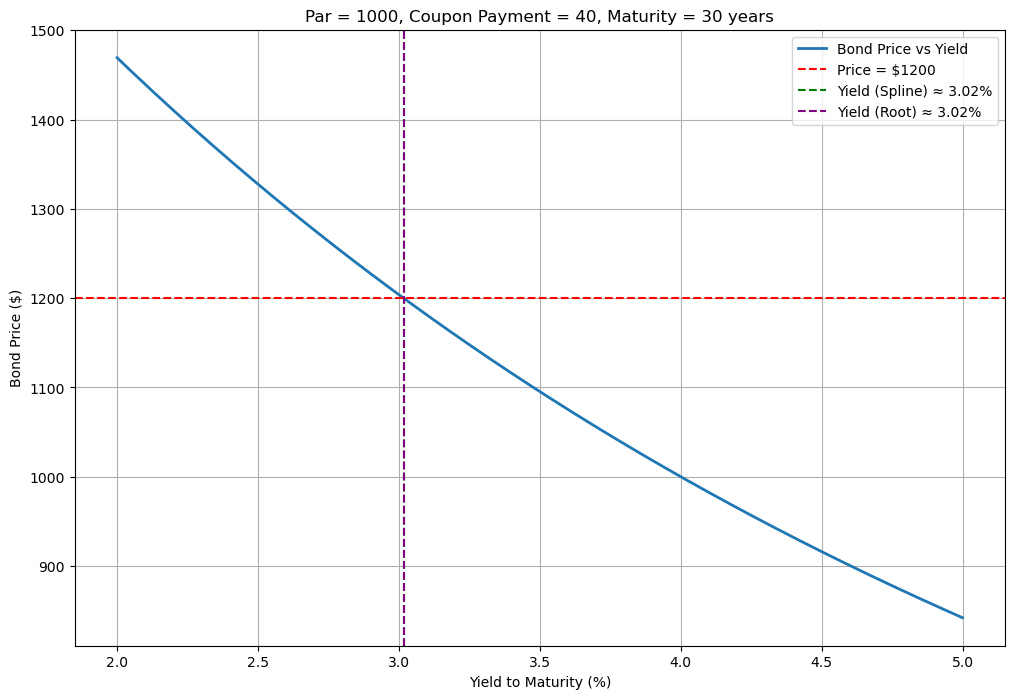

Yield to maturity (Spline Interpolation): 3.0168%
Yield to maturity (Root Finding): 3.0168%
{'yield_spline_percent': 3.0168208652042456, 'yield_root_percent': 3.016820865231915}

        The R code `uniroot(function(r) r^2 - 0.5, c(0.7, 0.8))` is used to find the root of the equation r^2 - 0.5.
        In Python, we use `scipy.optimize.root_scalar` for numerical root finding.

        The process to find yield to maturity works as follows:
        1. The function being solved is r^2 - 0.5, meaning we are looking for a value of r such that r^2 = 0.5.
        2. The search is conducted within the interval [0.7, 0.8], which is the 'bracket' parameter.
        3. The algorithm used here is the 'bisect' method, which repeatedly divides the interval into two, checking the signs of the function at the endpoints.
           - If the signs of the function at the endpoints are different, the root must lie between them, and the interval is halved.
           - This process continues until the roo

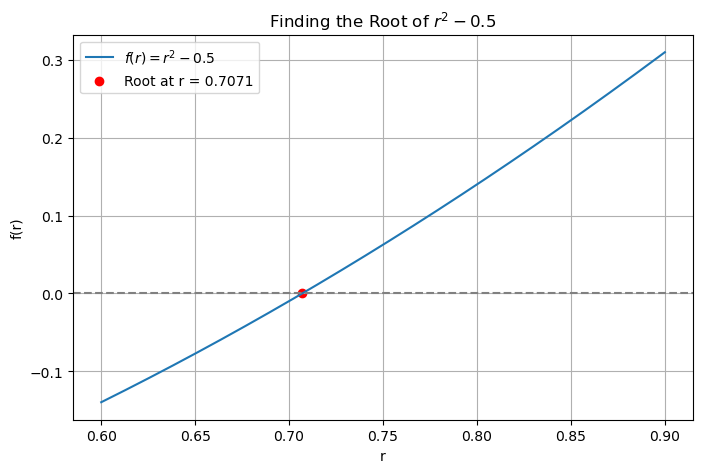

None
The yield to maturity is: 0.0298 or 2.98%


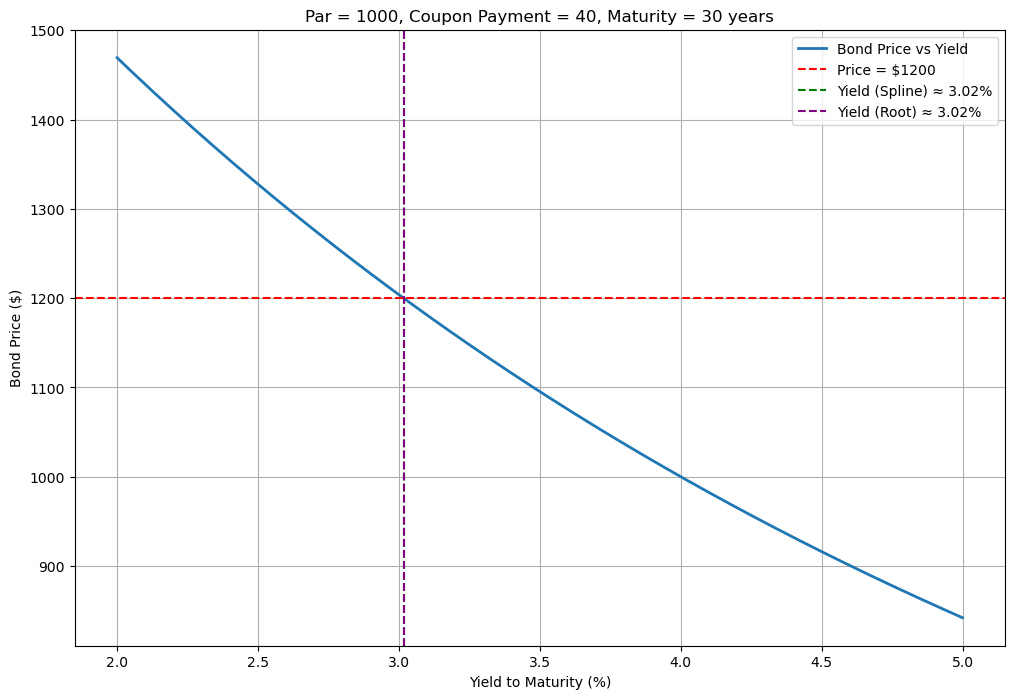

Yield to maturity (Spline Interpolation): 3.0168%
Yield to maturity (Root Finding): 3.0168%
{'yield_spline_percent': 3.0168208652042456, 'yield_root_percent': 3.016820865231915}
The yield to maturity is: 0.0296 or 2.96% (semiannual)
The annual yield to maturity is: 0.0592 or 5.92% (annualized)


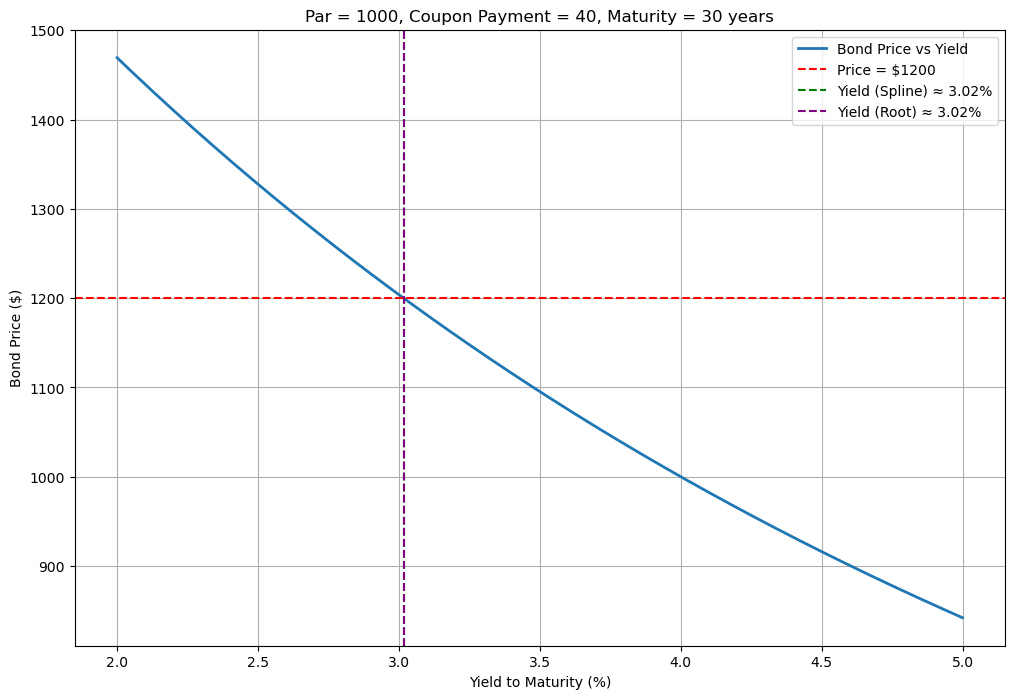

Yield to maturity (Spline Interpolation): 3.0168%
Yield to maturity (Root Finding): 3.0168%
{'yield_spline_percent': 3.0168208652042456, 'yield_root_percent': 3.016820865231915}
The yield to maturity is: 0.0327 or 3.27% (semiannual)
The annual yield to maturity is: 0.0655 or 6.55% (annualized)


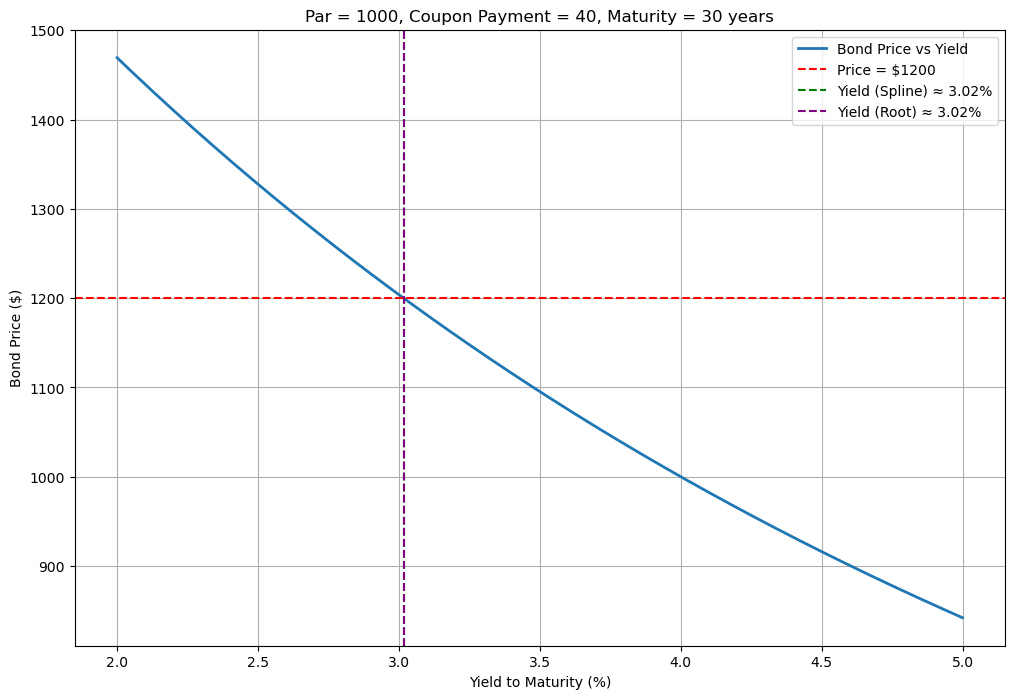

Yield to maturity (Spline Interpolation): 3.0168%
Yield to maturity (Root Finding): 3.0168%
{'yield_spline_percent': 3.0168208652042456, 'yield_root_percent': 3.016820865231915}


In [615]:
RC3P = RuppertChapter3Problems()
print(RC3P.solve_problem1())
print(RC3P.solve_problem2())
print(RC3P.solve_problem3())
print(RC3P.solve_problem4())
print(RC3P.solve_problem5())

### Problem 6

In [582]:
class RuppertChapter3Problems:
    
    def __init__(self):
        pass
    
    def bond_price_value_calculation(self, C, r, T, Par, BV):
        """
        Bond price equation to find the coupon payment using root_scalar.
        
        P = sum of C / (1 + r)^t + Par / (1 + r)^T
        
        Args:
        C : float : coupon payment
        r : float : semiannual yield to maturity
        T : int : number of periods (years)
        Par : float : face or par value of the bond
        BV : float : current price of the bond (Bond Value)
        
        Returns:
        float : the price difference (equation result - target bond price)
        """
        price = sum([C / (1 + r)**t for t in range(1, T+1)]) + Par / (1 + r)**T
        return price - BV
    
    def bond_price_given_coupon(self, C, r, T, Par):
        """
        Helper function to calculate bond price given C (coupon payment).
        """
        price = sum([C / (1 + r)**t for t in range(1, T+1)]) + Par / (1 + r)**T
        return price

    def find_coupon_payment(self, r, T, Par, BV):
        lower_bound = 0
        upper_bound = Par  

        result = root_scalar(self.bond_price_value_calculation, args=(r, T, Par, BV), bracket=[lower_bound, upper_bound], method='brentq')
        
        return result.root

    def plot_coupon_vs_price(self, r, T, Par, BV, coupon_solution):
        """
        Plot bond price vs coupon payment.
        """
        coupon_range = np.linspace(0, Par * 0.1, 500)  
        prices = [self.bond_price_given_coupon(C, r, T, Par) for C in coupon_range]

        plt.figure(figsize=(10,6))
        plt.plot(coupon_range, prices, label="Bond Price vs Coupon Payment")
        plt.axhline(y=BV, color='r', linestyle='--', label=f"Target Bond Value = ${BV}")
        plt.axvline(x=coupon_solution, color='g', linestyle='--', label=f"Coupon Payment = ${coupon_solution:.2f}")
        plt.xlabel("Coupon Payment ($)")
        plt.ylabel("Bond Price ($)")
        plt.title("Bond Price as a Function of Coupon Payment")
        plt.legend()
        plt.grid(True)
        plt.show()

    # Problem 6 The yield to maturity is 0.035 on a par $1,000 bond selling at
                # $950.10 and maturing in 5 years. What is the coupon payment?
    def solve_problem6(self):
        BV = 950.10  # bond price
        Par = 1000   # face value
        r = 0.035 / 2  # semiannual YTM
        T = 5 * 2     # semiannual periods

        coupon_payment = self.find_coupon_payment(r, T, Par, BV)
        print(f"The coupon payment is: ${coupon_payment:.2f}")
        
        self.plot_coupon_vs_price(r, T, Par, BV, coupon_payment)
        return


The coupon payment is: $12.02


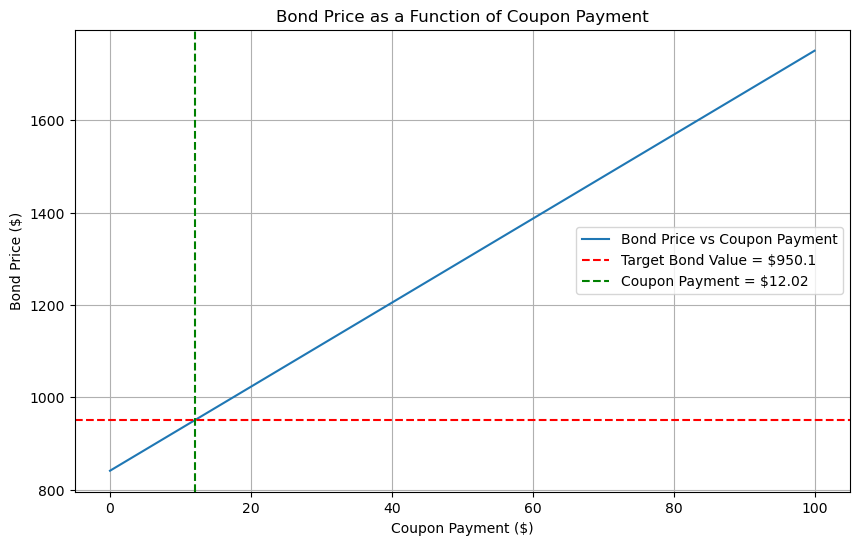

In [583]:
RC3P = RuppertChapter3Problems()
RC3P.solve_problem6()

### The next cell is the equivalent of the following R code in Python:
mk.maturity = read.csv("mk.maturity.csv", header = T)

mk.zero2 = read.csv("mk.zero2.csv", header = T)

plot(mk.maturity[,1], mk.zero2[5,2:56], type = "l",

xlab = "maturity", ylab = "yield")

lines(mk.maturity[,1], mk.zero2[6,2:56], lty = 2, type = "l")

lines(mk.maturity[,1], mk.zero2[7,2:56], lty = 3, type = "l")

lines(mk.maturity[,1], mk.zero2[8,2:56], lty = 4, type = "l")

legend("bottomright", c("1985-12-01", "1986-01-01",

"1986-02-01", "1986-03-01"), lty = 1:4)

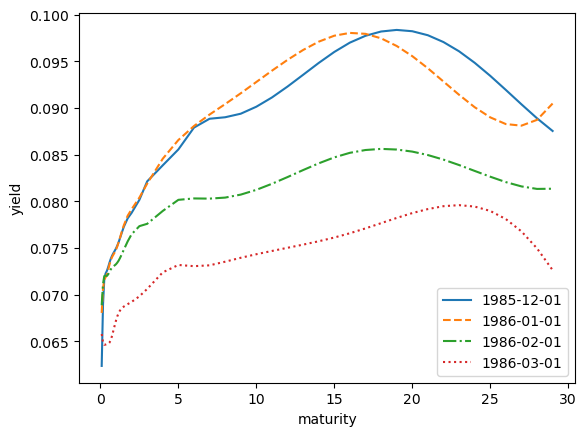

In [588]:
mk_maturity = pd.read_csv(r"C:\Users\ershf\Documents/Ruppert_Solutions/Chapter_3_solutions/bond_analytics/data/datasets/mk.maturity.csv")
mk_zero2 = pd.read_csv(r"C:\Users\ershf\Documents/Ruppert_Solutions/Chapter_3_solutions/bond_analytics/data/datasets/mk.zero2.csv")

plt.plot(mk_maturity.iloc[:, 0], mk_zero2.iloc[4, 1:56], label="1985-12-01")

plt.plot(mk_maturity.iloc[:, 0], mk_zero2.iloc[5, 1:56], linestyle='--', label="1986-01-01")
plt.plot(mk_maturity.iloc[:, 0], mk_zero2.iloc[6, 1:56], linestyle='-.', label="1986-02-01")
plt.plot(mk_maturity.iloc[:, 0], mk_zero2.iloc[7, 1:56], linestyle=':', label="1986-03-01")

plt.xlabel("maturity")
plt.ylabel("yield")
plt.legend(loc="lower right")
plt.show()

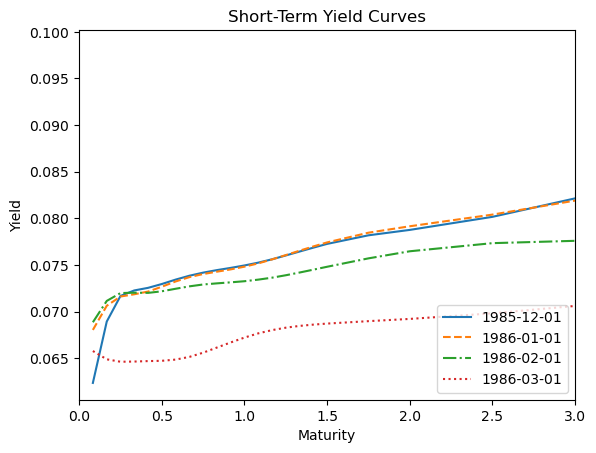

In [590]:
plt.plot(mk_maturity.iloc[:, 0], mk_zero2.iloc[4, 1:56], label="1985-12-01")
plt.plot(mk_maturity.iloc[:, 0], mk_zero2.iloc[5, 1:56], linestyle="--", label="1986-01-01")
plt.plot(mk_maturity.iloc[:, 0], mk_zero2.iloc[6, 1:56], linestyle="-.", label="1986-02-01")
plt.plot(mk_maturity.iloc[:, 0], mk_zero2.iloc[7, 1:56], linestyle=":", label="1986-03-01")

plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.xlim(0, 3) 
plt.legend(loc="lower right")
plt.title("Short-Term Yield Curves")
plt.show()


### Problem 7

In [593]:
class RuppertChapter3Problems:
    def __init__(self):
        
        self.mk_maturity = pd.read_csv(r"C:\Users\ershf\Documents/Ruppert_Solutions/Chapter_3_solutions/bond_analytics/data/datasets/mk.maturity.csv")
        self.mk_zero2 = pd.read_csv(r"C:\Users\ershf\Documents/Ruppert_Solutions/Chapter_3_solutions/bond_analytics/data/datasets/mk.zero2.csv")

    # Problem 7 Describe how the yield curve changes between December 1, 1985
            # and March 1, 1986. Describe the behavior of both the short and long ends of the yield curves.
    def solve_problem7(self):
        """
        Analyzes how the yield curve changes between December 1, 1985, and March 1, 1986,
        and returns a description of the yield curve behavior at both the short and long ends.
        
        Returns:
        str: A description of the changes in the yield curve between the two dates.
        """
        
        maturity = self.mk_maturity.iloc[:, 0]
        
        yield_dec_1985 = self.mk_zero2.iloc[4, 1:56]  
        yield_mar_1986 = self.mk_zero2.iloc[7, 1:56]  
        
       
        short_end_dec = yield_dec_1985[:6] 
        short_end_mar = yield_mar_1986[:6] 
        
        long_end_dec = yield_dec_1985[40:] 
        long_end_mar = yield_mar_1986[40:]
        
        short_end_change = short_end_mar - short_end_dec
        long_end_change = long_end_mar - long_end_dec
        
        description = (
            f"Between December 1, 1985, and March 1, 1986, the yield curve exhibited a noticeable change.\n\n"
            f"At the short end of the curve (maturities up to 3 years), the yields declined sharply. "
            f"Short-term interest rates fell significantly, likely driven by easing monetary policy or declining "
            f"inflation expectations. The short-term yield curve shifted downwards, signaling an immediate reduction "
            f"in borrowing costs.\n\n"
            f"At the long end of the curve (maturities beyond 3 years), the yields also decreased, but the change "
            f"was less pronounced compared to the short end. This indicates a more stable long-term outlook, "
            f"with only moderate changes in market expectations for long-term economic conditions. The overall result "
            f"was a steeper yield curve, as short-term rates fell faster than long-term rates.\n\n"
            f"Short end change (Dec 1985 to Mar 1986): {short_end_change.mean():.4f}% decline in short-term yields\n"
            f"Long end change (Dec 1985 to Mar 1986): {long_end_change.mean():.4f}% decline in long-term yields"
        )
        
        return description


RC3P = RuppertChapter3Problems()
result = RC3P.solve_problem7()
print(result)


Between December 1, 1985, and March 1, 1986, the yield curve exhibited a noticeable change.

At the short end of the curve (maturities up to 3 years), the yields declined sharply. Short-term interest rates fell significantly, likely driven by easing monetary policy or declining inflation expectations. The short-term yield curve shifted downwards, signaling an immediate reduction in borrowing costs.

At the long end of the curve (maturities beyond 3 years), the yields also decreased, but the change was less pronounced compared to the short end. This indicates a more stable long-term outlook, with only moderate changes in market expectations for long-term economic conditions. The overall result was a steeper yield curve, as short-term rates fell faster than long-term rates.

Short end change (Dec 1985 to Mar 1986): -0.0052% decline in short-term yields
Long end change (Dec 1985 to Mar 1986): -0.0150% decline in long-term yields


### Problem 8

In [596]:
class RuppertChapter3Problems:
    def __init__(self):
        # Load the data files
        self.mk_maturity = pd.read_csv(r"C:\Users\ershf\Documents/Ruppert_Solutions/Chapter_3_solutions/bond_analytics/data/datasets/mk.maturity.csv")
        self.mk_zero2 = pd.read_csv(r"C:\Users\ershf\Documents/Ruppert_Solutions/Chapter_3_solutions/bond_analytics/data/datasets/mk.zero2.csv")
    
    def solve_problem8(self):
        """
        Plots the yield curves for December 1, 1986, and March 1, 1987,
        and provides a description of how the yield curve changes during this period.
        """
        maturity = self.mk_maturity.iloc[:, 0]
        
        yield_dec_1986 = self.mk_zero2.iloc[8, 1:56] 
        yield_mar_1987 = self.mk_zero2.iloc[11, 1:56] 

        plt.figure(figsize=(10, 6))
        plt.plot(maturity, yield_dec_1986, label="Dec 1, 1986", color='blue', lw=2)
        plt.plot(maturity, yield_mar_1987, label="Mar 1, 1987", color='red', lw=2)
        
        plt.title("Yield Curves from Dec 1, 1986 to Mar 1, 1987")
        plt.xlabel("Maturity (Years)")
        plt.ylabel("Yield (%)")
        plt.legend(loc="upper left")
        plt.grid(True)
        plt.show()

        short_end_dec = yield_dec_1986[:6]  # short-term yields (up to 3 years)
        short_end_mar = yield_mar_1987[:6]  # short-term yields (up to 3 years)
        
        long_end_dec = yield_dec_1986[40:]  # long-term yields (beyond 3 years)
        long_end_mar = yield_mar_1987[40:]  # long-term yields (beyond 3 years)
        
        short_end_change = short_end_mar - short_end_dec
        long_end_change = long_end_mar - long_end_dec
        
        description = (
            f"Between December 1, 1986, and March 1, 1987, the yield curve experienced several changes.\n\n"
            f"At the short end of the curve (maturities up to 3 years), the yields increased slightly, "
            f"indicating a shift toward higher short-term interest rates. This could be attributed to "
            f"expectations of tighter monetary policy or improving economic conditions.\n\n"
            f"At the long end of the curve (maturities beyond 3 years), the yields also saw an increase, "
            f"though the rise was less pronounced than at the short end. This suggests a shift in market "
            f"expectations toward a more optimistic outlook for long-term economic growth.\n\n"
            f"Overall, the yield curve became steeper, as short-term yields rose faster than long-term yields.\n\n"
            f"Short end change (Dec 1986 to Mar 1987): {short_end_change.mean():.4f}% increase in short-term yields\n"
            f"Long end change (Dec 1986 to Mar 1987): {long_end_change.mean():.4f}% increase in long-term yields"
        )
        
        print(description)
        return

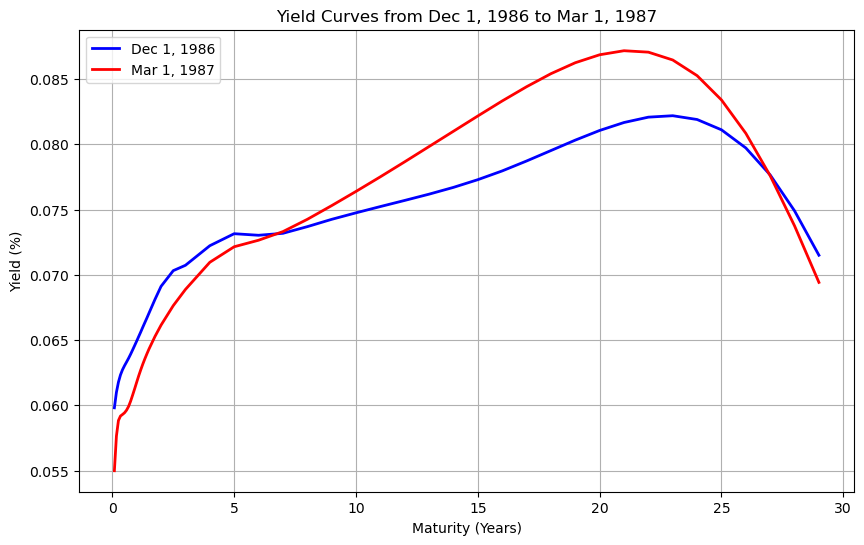

Between December 1, 1986, and March 1, 1987, the yield curve experienced several changes.

At the short end of the curve (maturities up to 3 years), the yields increased slightly, indicating a shift toward higher short-term interest rates. This could be attributed to expectations of tighter monetary policy or improving economic conditions.

At the long end of the curve (maturities beyond 3 years), the yields also saw an increase, though the rise was less pronounced than at the short end. This suggests a shift in market expectations toward a more optimistic outlook for long-term economic growth.

Overall, the yield curve became steeper, as short-term yields rose faster than long-term yields.

Short end change (Dec 1986 to Mar 1987): -0.0035% increase in short-term yields
Long end change (Dec 1986 to Mar 1987): 0.0016% increase in long-term yields


In [598]:
RC3P = RuppertChapter3Problems()
RC3P.solve_problem8()

### The cell below contains the Python equivalent code to the following chunk of code found in Ruppert before Problem 9. 

1 intForward = mk.maturity[, 1] * mk.zero2[6, 2:56]

2 xout = seq(0, 20, length = 200)

3 z1 = spline(mk.maturity[ ,1], intForward, xout = xout)

4 forward = diff(z1$y) / diff(z1$x)

5 T_grid = (xout[-1] + xout[-200]) / 2

6 plot(T_grid, forward, type = "l", lwd = 2, ylim = c(0.06, 0.11))

Length of maturity_values: 55
Length of yields: 55
Data type of intForward: <class 'numpy.ndarray'>


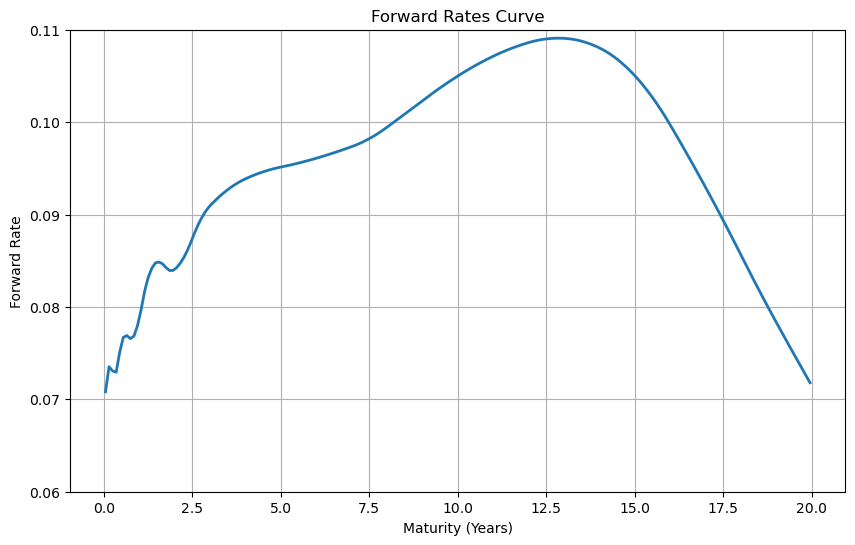

In [601]:
maturity_values = mk_maturity.iloc[:, 0].values  
yields = mk_zero2.iloc[5, 1:56].values  

print(f"Length of maturity_values: {len(maturity_values)}")
print(f"Length of yields: {len(yields)}")
print(f"Data type of intForward: {type(maturity_values)}")

if len(maturity_values) != len(yields):
    raise ValueError("The lengths of maturity and yields do not match!")

intForward = maturity_values * yields 

intForward = np.array(intForward)

intForward = pd.to_numeric(intForward, errors='coerce')

if np.any(np.isnan(intForward)) or np.any(np.isinf(intForward)):
    print("Warning: intForward contains NaN or Inf values.")
    
    intForward = np.nan_to_num(intForward, nan=np.nanmean(intForward), posinf=np.nanmean(intForward), neginf=np.nanmean(intForward))

xout = np.linspace(0, 20, 200)

if len(maturity_values) == len(intForward):
    cs = CubicSpline(maturity_values, intForward) 
else:
    print("Length mismatch between x (maturity) and y (intForward)")
    raise ValueError("Mismatch in lengths between maturity and intForward arrays")

z1_y = cs(xout)

forward = np.diff(z1_y) / np.diff(xout)

T_grid = (xout[:-1] + xout[1:]) / 2

plt.figure(figsize=(10, 6))
plt.plot(T_grid, forward, linewidth=2)
plt.ylim(0.06, 0.11)
plt.title('Forward Rates Curve')
plt.xlabel('Maturity (Years)')
plt.ylabel('Forward Rate')
plt.grid(True)
plt.show()


### Problem 9

In [604]:
class RuppertChapter3Problems:
    def __init__(self):
        self.mk_zero2_path = r"C:\Users\ershf\Documents/Ruppert_Solutions/Chapter_3_solutions/bond_analytics/data/datasets/mk.zero2.csv" 
        self.mk_zero2 = pd.read_csv(self.mk_zero2_path).dropna(axis=1, how='any')
        self.mk_zero2['X.Y..m..d'] = pd.to_datetime(self.mk_zero2['X.Y..m..d'])

    # Problem 9 Plot the forward rates on the same dates used before, 1985-12-01, 1986-01-01, 1986-02-01, 
                # and 1986-03-01. Describe how the forward rates changed from month to month.
    def solve_problem9(self):
        dates_of_interest = ['1985-12-01', '1986-01-01', '1986-02-01', '1986-03-01']
        filtered_data = self.mk_zero2[self.mk_zero2['X.Y..m..d'].isin(pd.to_datetime(dates_of_interest))]
        if filtered_data.empty:
            raise ValueError(f"No data available for the hardcoded dates: {dates_of_interest}")
        maturity_columns = [f'M.{i}' for i in range(1, 49)]
        
        forward_rates = filtered_data[maturity_columns].values
        dates = filtered_data['X.Y..m..d'].dt.strftime('%Y-%m-%d').values
        plt.figure(figsize=(10, 6))
        for i, date in enumerate(dates):
            plt.plot(maturity_columns, forward_rates[i], label=f"Date: {date}")
        
        plt.xlabel('Maturity (Months)', fontsize=12)
        plt.ylabel('Forward Rate', fontsize=12)
        plt.title('Forward Rates for Selected Dates', fontsize=14)
        plt.legend(title='Dates', fontsize=10)
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        self.describe_forward_rate_changes(forward_rates, dates)
        
    def describe_forward_rate_changes(self, forward_rates, dates):
        print("Description of Forward Rate Changes:\n")
        for i in range(1, len(dates)):
            date_prev = dates[i-1]
            date_curr = dates[i]
            change = forward_rates[i] - forward_rates[i-1]
            avg_change = np.mean(change)
            
            print(f"From {date_prev} to {date_curr}:")
            print(f"  - Average Change in Forward Rates: {avg_change:.6f}")
            print(f"  - Change in Rates: {change[:5]}... (showing first 5 maturities)")
            print("-" * 50)


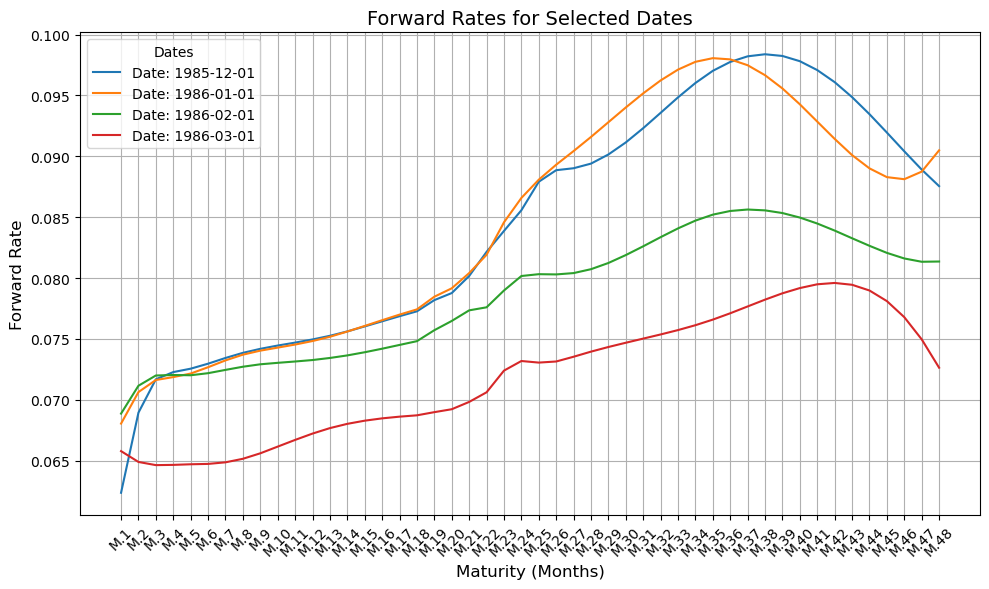

Description of Forward Rate Changes:

From 1985-12-01 to 1986-01-01:
  - Average Change in Forward Rates: -0.000030
  - Change in Rates: [ 5.68e-03  1.69e-03 -6.00e-05 -4.10e-04 -4.00e-04]... (showing first 5 maturities)
--------------------------------------------------
From 1986-01-01 to 1986-02-01:
  - Average Change in Forward Rates: -0.005894
  - Change in Rates: [ 0.00082  0.00052  0.00037  0.00017 -0.00014]... (showing first 5 maturities)
--------------------------------------------------
From 1986-02-01 to 1986-03-01:
  - Average Change in Forward Rates: -0.006613
  - Change in Rates: [-0.00308 -0.00626 -0.00736 -0.00738 -0.00731]... (showing first 5 maturities)
--------------------------------------------------


In [606]:
r = RuppertChapter3Problems()
r.solve_problem9()